<a href="https://colab.research.google.com/github/utkar22/Advance-Programming-Assignments/blob/main/IR_A3_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Navigate to the folder IR_A3 on my drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/IR_A3

Mounted at /content/drive
/content/drive/MyDrive/IR_A3


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('reddit.tsv', sep='\t')

In [4]:
df.head()

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES
0,leagueoflegends,teamredditteams,1u4nrps,2013-12-31 16:39:58,1,"345.0,298.0,0.75652173913,0.0173913043478,0.08..."
1,theredlion,soccer,1u4qkd,2013-12-31 18:18:37,-1,"101.0,98.0,0.742574257426,0.019801980198,0.049..."
2,inlandempire,bikela,1u4qlzs,2014-01-01 14:54:35,1,"85.0,85.0,0.752941176471,0.0235294117647,0.082..."
3,nfl,cfb,1u4sjvs,2013-12-31 17:37:55,1,"1124.0,949.0,0.772241992883,0.0017793594306,0...."
4,playmygame,gamedev,1u4w5ss,2014-01-01 02:51:13,1,"715.0,622.0,0.777622377622,0.00699300699301,0...."


Creating a list of all the subreddits

In [8]:
all_subs = []
for i in df["SOURCE_SUBREDDIT"]:
    if i not in all_subs:
        all_subs.append(i)

for i in df["TARGET_SUBREDDIT"]:
    if i not in all_subs:
        all_subs.append(i)

Mapping the name of the subreddit to the index in the array

In [10]:
sub_index = {}
for i in range(len(all_subs)):
    sub_index[all_subs[i]] = i

In [11]:
num_nodes = len(all_subs)

In [12]:
adj_matrix = []
for i in range(num_nodes):
    curr = []
    for j in range(num_nodes):
        curr.append(0)
    adj_matrix.append(curr)

edge_list = []

In [14]:
for index, row in df.iterrows():
    sub1 = row[0]
    sub2 = row[1]

    id1 = sub_index[sub1]
    id2 = sub_index[sub2]

    tup = (id1,id2)

    adj_matrix[id1][id2] = 1
    
    if tup not in edge_list:
        edge_list.append(tup)

The number of nodes in the graph

In [15]:
print(f"The number of nodes is: {num_nodes}")

The number of nodes is: 35776


The number of edges in the graph

In [16]:
num_edges = len(edge_list)
print(f"The number of edges is: {num_edges}")

The number of edges is: 137821


Average In-Degree: In a directed network, the in-degree of a node is the number of incoming edges to that node. The average in-degree of a network is the sum of in-degrees for all nodes divided by the total number of nodes in the network.

In [18]:
avg_in_degree = num_edges/num_nodes
print(f"The average in-degree is: {avg_in_degree}")

The average in-degree is: 3.8523311717352415


Average Out-Degree: In a directed network, the out-degree of a node is the number of outgoing edges from that node. The average out-degree of a network is the sum of out-degrees for all nodes divided by the total number of nodes in the network.

In [20]:
avg_out_degree = num_edges/num_nodes
print(f"The average out-degree is: {avg_out_degree}")

The average out-degree is: 3.8523311717352415


Node with Maximum In-Degree: In a directed network, the node with the maximum in-degree is the node that has the highest number of incoming edges.

In [21]:
max_in_degree = 0
max_in_degree_node = None

for j in range(num_nodes):
    curr_node = all_subs[j]
    curr_in_degree = 0
    for i in range(num_nodes):
        curr_in_degree+=adj_matrix[i][j]

    if (curr_in_degree>max_in_degree):
        max_in_degree = curr_in_degree
        max_in_degree_node = curr_node

print(f"The node with the maximum in degree is {max_in_degree_node} with an in degree of {max_in_degree}")

The node with the maximum in degree is askreddit with an in degree of 2161


Node with Maximum Out-Degree: In a directed network, the node with the maximum out-degree is the node that has the highest number of outgoing edges.

In [22]:
out_degree_dict = {}

max_out_degree = 0
max_out_degree_node = None

for i in range(num_nodes):
    curr_node = all_subs[i]
    curr_out_degree = sum(adj_matrix[i])

    if (curr_out_degree > max_out_degree):
        max_out_degree = curr_out_degree
        max_out_degree_node = curr_node

    if curr_out_degree not in out_degree_dict:
        out_degree_dict[curr_out_degree] = 0
    out_degree_dict[curr_out_degree]+=1

print(f"The Maximum Out-Degree is {max_out_degree}. One of the nodes with this out degree is {max_out_degree_node}")

The Maximum Out-Degree is 1350. One of the nodes with this out degree is subredditdrama


Density of the Network: In a network, the density is the proportion of the total number of edges that are present in the network to the total number of possible edges that could exist.

In [23]:
max_edges = num_nodes*(num_nodes - 1)
density = num_edges/max_edges
print(f"The density is: {density}")

The density is: 0.00010768221304640787


In degree distribution:

In [32]:
import matplotlib.pyplot as plt

In [40]:
in_degree_dict = {}

for j in range(num_nodes):
    curr_in_degree = 0
    for i in range(num_nodes):
        curr_in_degree+=adj_matrix[i][j]

    if (curr_in_degree not in in_degree_dict):
        in_degree_dict[curr_in_degree] = 0
    in_degree_dict[curr_in_degree]+=1

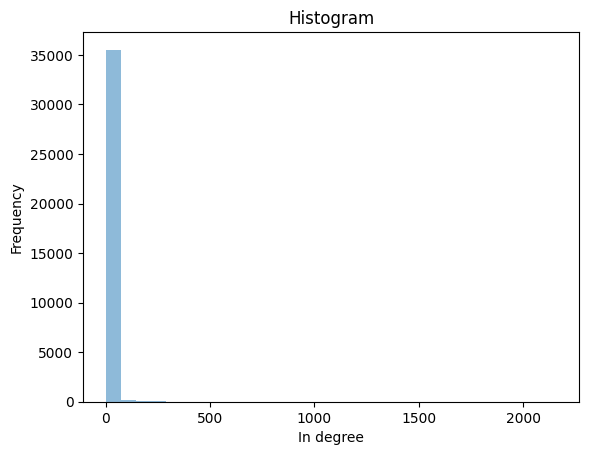

In [41]:
x_in = list(in_degree_dict.keys())
x_in.sort()

y_in=[]

for i in range(len(x_in)):
    curr = in_degree_dict[x_in[i]]
    y_in.append(curr)

plt.hist(x_in, weights=y_in, bins=30, alpha=0.5)
plt.title('Histogram')
plt.xlabel('In degree')
plt.ylabel('Frequency')
plt.show()

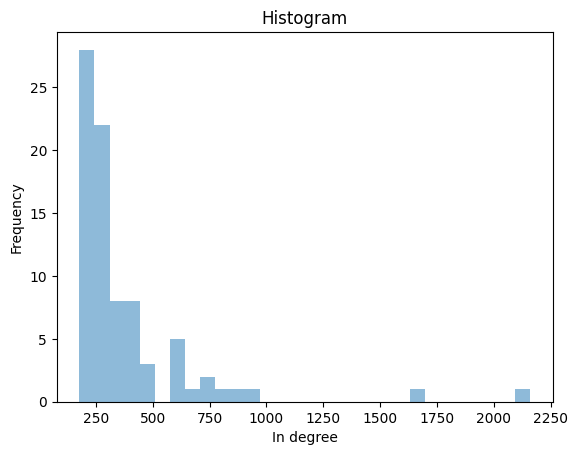

In [44]:
x_in = x_in[150:]
y_in = y_in[150:]

plt.hist(x_in, weights=y_in, bins=30, alpha=0.5)
plt.title('Histogram')
plt.xlabel('In degree')
plt.ylabel('Frequency')
plt.show()

Out degree distribution

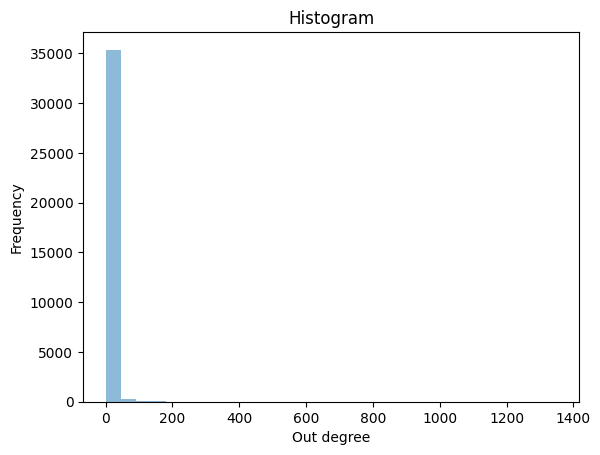

In [42]:
x_out = list(out_degree_dict.keys())
x_out.sort()

y_out=[]

for i in range(len(x_out)):
    curr = out_degree_dict[x_out[i]]
    y_out.append(curr)

plt.hist(x_out, weights=y_out, bins=30, alpha=0.5)
plt.title('Histogram')
plt.xlabel('Out degree')
plt.ylabel('Frequency')
plt.show()

Omitting the first 200 values

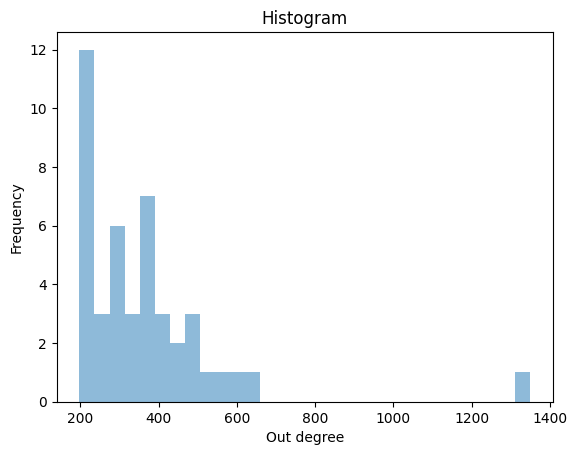

In [43]:
x_out = x_out[150:]
y_out = y_out[150:]

plt.hist(x_out, weights=y_out, bins=30, alpha=0.5)
plt.title('Histogram')
plt.xlabel('Out degree')
plt.ylabel('Frequency')
plt.show()

Calculating the Local Clustering Coefficient of all Nodes

In [48]:
def calculate_lcc(nodes_arr):
    tot_nodes = len(nodes_arr)

    if (tot_nodes<2):
        return 0
        
    tot_edges = 0
    
    for i in nodes_arr:
        for j in nodes_arr:
            if adj_matrix[i][j]:
                tot_edges+=1

    lcc = tot_edges/(tot_nodes*(tot_nodes-1))

    return lcc

In [49]:
lcc_dict_unweighted = {}
lcc_dict_weighted = {}

for i in range(num_nodes):
    
    in_nodes = []
    out_nodes = []

    for j in range(num_nodes):
        if adj_matrix[j][i] == 1:
            in_nodes.append(j)

    for j in range(num_nodes):
        if adj_matrix[i][j] == 1:
            out_nodes.append(i)

    in_lcc = calculate_lcc(in_nodes)
    out_lcc = calculate_lcc(out_nodes)

    unweighted_lcc = round((in_lcc+out_lcc)/2,2)
    weighted_lcc = round((len(in_nodes)*in_lcc + len(out_nodes)*out_lcc)/(len(in_nodes)+len(out_nodes)),2)

    if (unweighted_lcc not in lcc_dict_unweighted):
        lcc_dict_unweighted[unweighted_lcc] = 0
    lcc_dict_unweighted[unweighted_lcc]+=1

    if (weighted_lcc not in lcc_dict_weighted):
        lcc_dict_weighted[weighted_lcc] = 0
    lcc_dict_weighted[weighted_lcc]+=1

Unweighted Local Clustering Coefficients

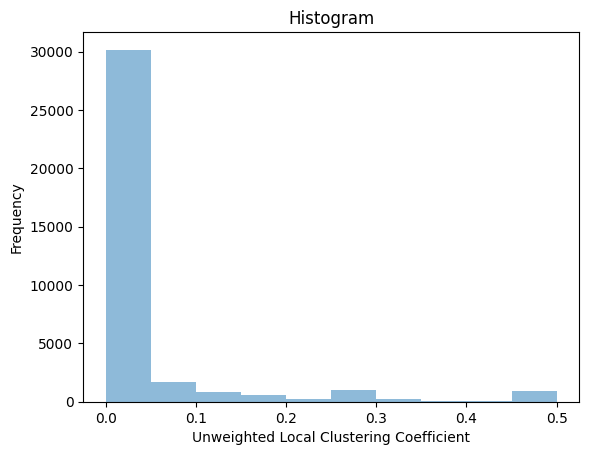

In [51]:
x_un = list(lcc_dict_unweighted.keys())
x_un.sort()

y_un=[]

for i in range(len(x_un)):
    curr = lcc_dict_unweighted[x_un[i]]
    y_un.append(curr)

plt.hist(x_un, weights=y_un, alpha=0.5)
plt.title('Histogram')
plt.xlabel('Unweighted Local Clustering Coefficient')
plt.ylabel('Frequency')
plt.show()

Weighted Local Clustering Coefficients

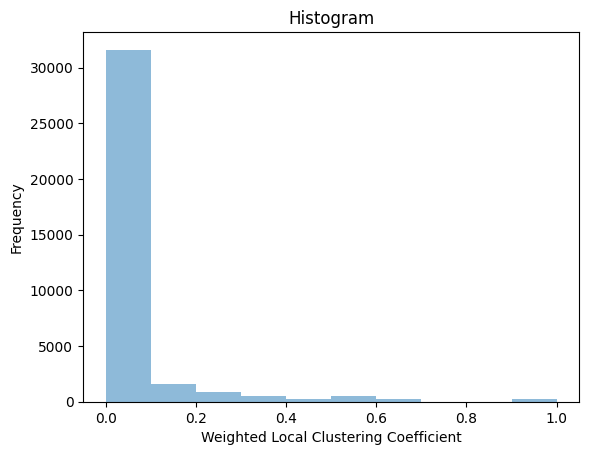

In [52]:
x_w = list(lcc_dict_weighted.keys())
x_w.sort()

y_w=[]

for i in range(len(x_w)):
    curr = lcc_dict_weighted[x_w[i]]
    y_w.append(curr)

plt.hist(x_w, weights=y_w, alpha=0.5)
plt.title('Histogram')
plt.xlabel('Weighted Local Clustering Coefficient')
plt.ylabel('Frequency')
plt.show()

Question 2

In [53]:
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
import networkx as nx

In [55]:
G = nx.DiGraph()
G.add_edges_from(edge_list)

PageRank score for each node

In [56]:
pr = nx.pagerank(G, alpha=0.85, tol = 1e-6)

Authority and Hub score for each node

In [57]:
auth_scores, hub_scores = nx.hits(G, max_iter=100, tol=1e-6, normalized=True)

Comparing the scores

In [69]:
pr_arr = []
auth_arr = []
hub_arr = []

for i in range(num_nodes):
    pr_arr.append(pr[i])
    auth_arr.append(auth_scores[i])
    hub_arr.append(hub_scores[i])

In [70]:
score_df = pd.DataFrame({"Subreddit":all_subs, "Page Rank Score":pr_arr, "Authority Score":auth_arr, "Hub Score":hub_arr})

In [75]:
score_df.head(50)

,Subreddit,Page Rank Score,Authority Score,Hub Score
0,leagueoflegends,0.003620,1.163430e-03,2.498304e-03
1,theredlion,0.000009,2.271660e-04,5.831212e-05
2,inlandempire,0.000021,1.612344e-05,8.249749e-05
3,nfl,0.001360,3.280045e-04,1.745093e-03
4,playmygame,0.000134,1.694628e-04,4.655423e-05
5,dogemarket,0.000556,1.250484e-04,1.668185e-04
6,locationbot,0.000008,2.093679e-05,-4.413526e-20
7,indiefied,0.000008,8.394780e-05,-1.111755e-21
8,posthardcore,0.000129,2.054244e-05,9.417477e-05
9,gfycat,0.000054,1.144397e-04,8.389728e-05


In [77]:
corr_pr_a = score_df['Page Rank Score'].corr(score_df['Authority Score'], method='pearson')
corr_pr_h = score_df['Page Rank Score'].corr(score_df['Hub Score'], method='pearson')
corr_a_h = score_df['Authority Score'].corr(score_df['Hub Score'], method='pearson')

In [80]:
print(f"The correlation between Page Rank Score and Authority Score is {corr_pr_a}")
print(f"The correlation between Page Rank Score and Hub Score is {corr_pr_h}")
print(f"The correlation between Authority Score and Hub Score is {corr_a_h}")

The correlation between Page Rank Score and Authority Score is 0.44667468261192805
The correlation between Page Rank Score and Hub Score is 0.8485383243837176
The correlation between Authority Score and Hub Score is 0.5551260436796563
